### Linear Regression and Train/Test Split challenges

Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
movies_df = pd.read_csv('data/2013_movies.csv')

In [3]:
movies_df.dropna(inplace=True)

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


In [5]:
movies_df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.700000e+01,8.700000e+01,87.000000
mean,7.545402e+07,1.035153e+08,112.551724
std,5.969168e+07,8.797319e+07,17.854554
min,2.500000e+06,2.556825e+07,80.000000
25%,2.900000e+07,4.793810e+07,98.000000
50%,5.500000e+07,7.162818e+07,113.000000
75%,1.125000e+08,1.238093e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross).

In [6]:
movies_df['constant'] = 1

In [7]:
X1 = movies_df['constant']
y1 = movies_df['DomesticTotalGross']

In [8]:
model_1 = sm.OLS(y1, X1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 06 Feb 2017   Prob (F-statistic):                nan
Time:                        16:23:31   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    1.035e+08   9.43e+06     10.975      0.000      8.48e+07  1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How can you interpret the results of this model? What does it predict?

> This model is solving the following equation:

>> $\hat{y}(\beta, x) = \beta_1x_1$

> The model's only feature, $x_1$, is constant, yielding no useful information to calculate $\hat{y}$. Since $x_1$ is equal to 1 for all observations, $\beta_1$ is equal to the mean of $y$, as that is the best guess the model can make.

Make a plot of predictions against actual outcome.

In [9]:
def predict_plot(y, y_hat):
    fig, ax = plt.subplots(figsize=(10,6)) 
    fig = sns.regplot(y, y_hat)
    fig.set(xlabel = 'Actual',
            ylabel = 'Predicted')
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    return fig

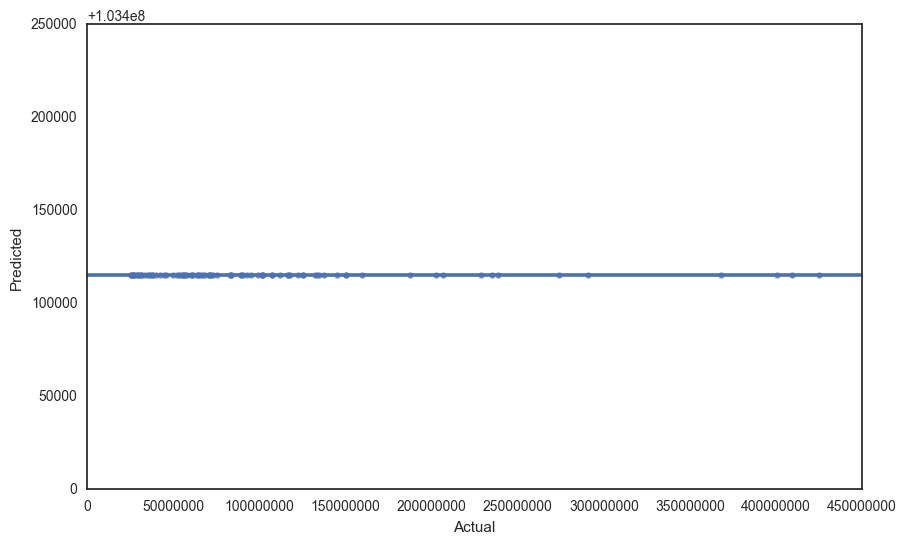

In [10]:
y_hat1 = model_1.predict(X1)
predict_plot(y1, y_hat1);

> As expected, the model makes the same prediction for each observation, yielding a line with zero slope at the mean of $y$.

Make a histogram of residuals. How are the residuals distributed?

In [11]:
def res_hist(y, y_hat):
    fig, ax = plt.subplots(figsize=(10,6)) 
    res = y - y_hat
    fig = sns.distplot(res, kde=False, ax=ax);
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    return fig

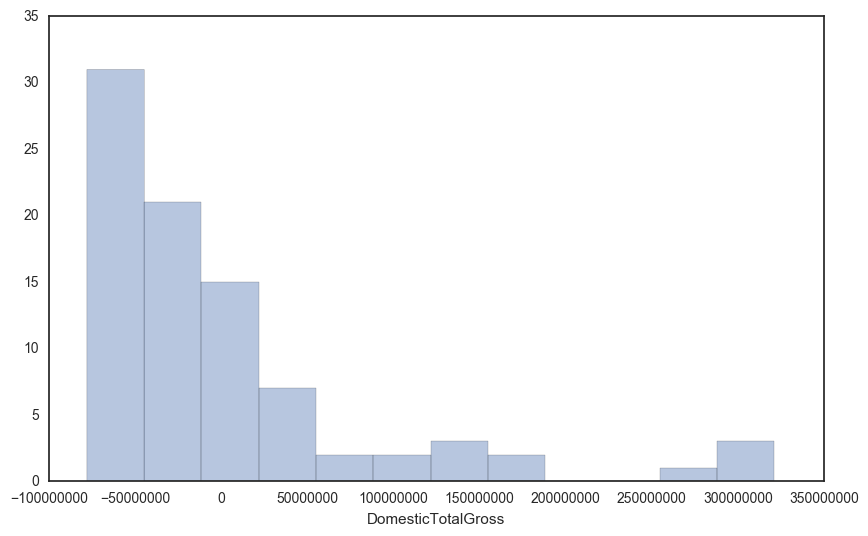

In [12]:
res_hist(y1, y_hat1);

In [13]:
y1.mean(), y1.std()

(103515275.64367816, 87973190.51690322)

> Most of the residuals are within 1 standard deviation of zero, meaning that the estimated value of Domestic Total Gross was within 1 standard deviation of the actual Domestic Total Gross for most movies. There are positive outliers, which represent movies that did significantly better than predicted--well above the mean of the actual Domestic Total Gross.

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable.

In [14]:
X2 = movies_df[['constant', 'Runtime']]
y2 = movies_df['DomesticTotalGross']

In [15]:
model_2 = sm.OLS(y2, X2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.458
Date:                Mon, 06 Feb 2017   Prob (F-statistic):             0.0129
Time:                        16:23:32   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3426.
Df Residuals:                      85   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant   -4.384e+07   5.87e+07     -0.747      0.457     -1.61e+08  7.29e+07
Runtime     1.309e+06   5.15e+05      2.541      0.013      2.85e+05  2.33e+06
==============================================================================
Omnibus:                       46.746   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.557
Skew:                           1.982   Prob(JB):                     8.07e-26
Kurtosis:                       7.021   Cond. No.                         731.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Also add plots of model prediction against your feature variable and residuals against feature variable.

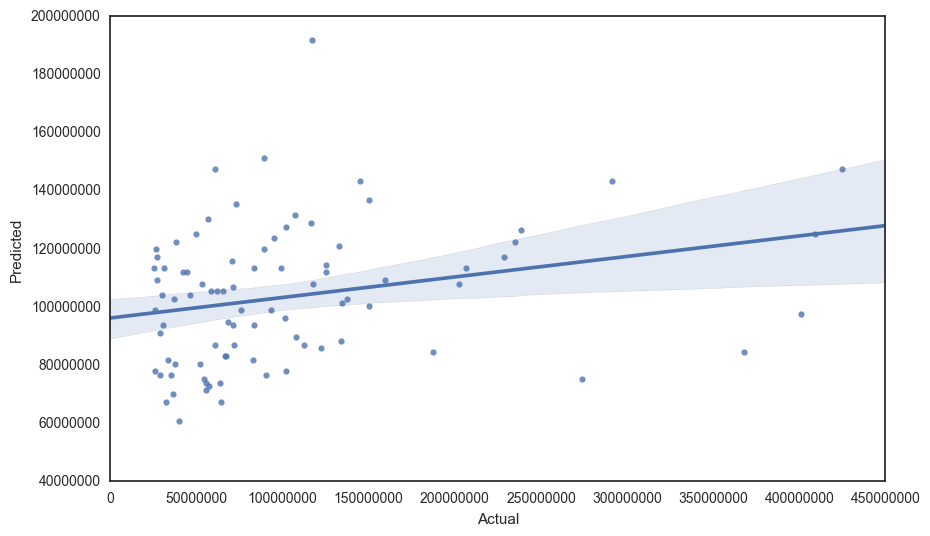

In [16]:
y_hat2 = model_2.predict(X2)
predict_plot(y2, y_hat2);

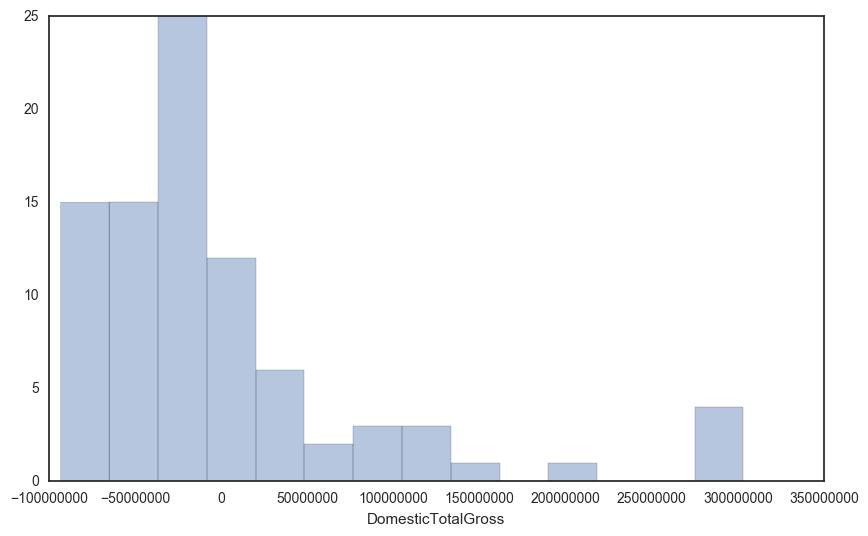

In [18]:
res_hist(y2, y_hat2);

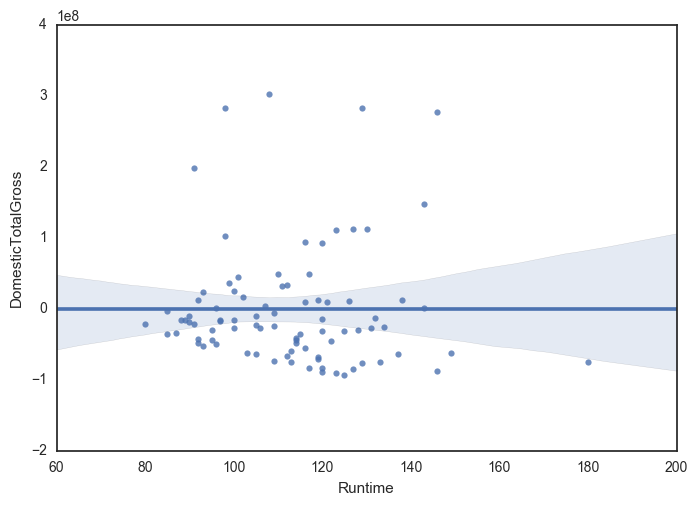

In [19]:
res = y2 - y_hat2
feature = X2['Runtime']
sns.regplot(feature, res);

How can you interpret what's happening in the model?

> This model is solving the following equation:

>> $\hat{y}(\beta, x) = \beta_1x_1 + \beta_2x_2$

> While $x_1$ is still constant, yielding no useful information to calculate $\hat{y}$, $x_2$ now adds variable information (run time) to inform the prediction. Since $x_1$ is still equal to 1 for all observations, $\beta_1$ is equal to the mean of $y$, which is the intercept. The slope represents the relationship between run time and domestic total gross; the positive slope suggests that there is a positive relationship.

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables").

In [20]:
movies_df['Rating'].value_counts()

PG-13    40
R        33
PG       14
Name: Rating, dtype: int64

In [21]:
rating_dummies = pd.get_dummies(movies_df['Rating'], prefix='rating', drop_first=True)
movies_df = movies_df.merge(rating_dummies, left_index=True, right_index=True)

In [26]:
X3 = movies_df[['constant', 'rating_PG-13', 'rating_R']]
y3 = movies_df['DomesticTotalGross']

In [27]:
model_3 = sm.OLS(y3, X3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Mon, 06 Feb 2017   Prob (F-statistic):             0.0440
Time:                        16:24:51   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3428.
Df Residuals:                      84   BIC:                             3436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
constant      1.319e+08   2.29e+07      5.756      0.000      8.64e+07  1.78e+08
rating_PG-13 -1.422e+07   2.66e+07     -0.534      0.595     -6.72e+07  3.87e+07
rating_R     -5.772e+07   2.74e+07     -2.110      0.038     -1.12e+08 -3.32e+06
==============================================================================
Omnibus:                       39.974   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.928
Skew:                           1.759   Prob(JB):                     5.96e-19
Kurtosis:                       6.283   Cond. No.                         5.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

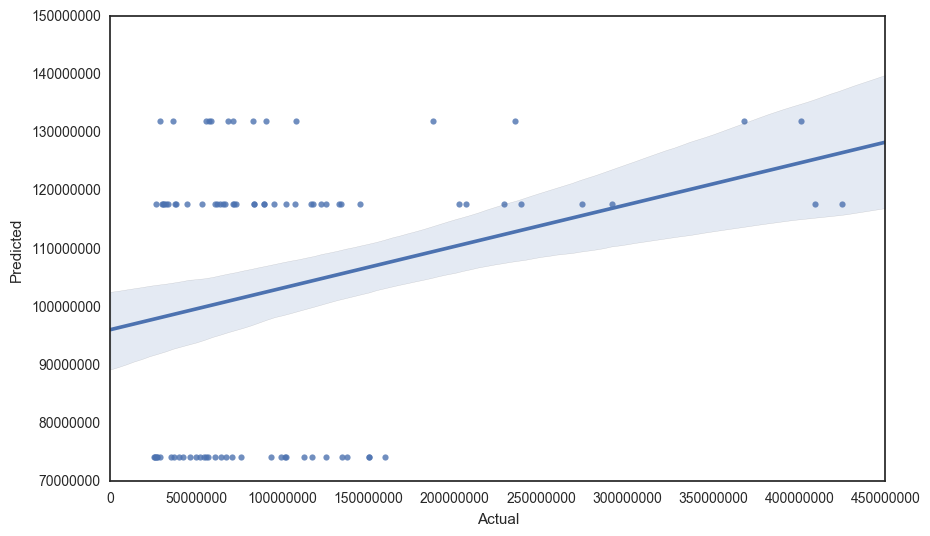

In [28]:
y_hat3 = model_3.predict(X3)
predict_plot(y3, y_hat3);

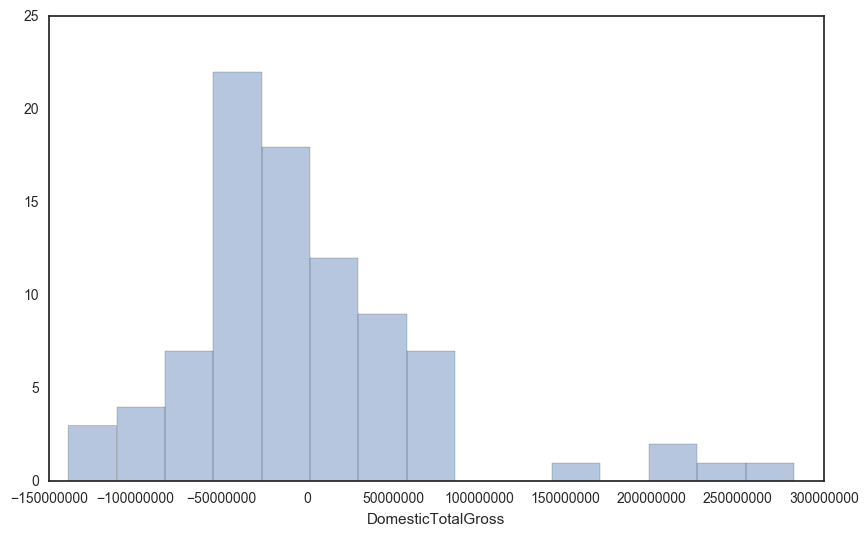

In [25]:
res_hist(y3, y_hat3);

How can you interpret what's happening in the model?

> This model is solving the following equation:

>> $\hat{y}(\beta, x) = \beta_1x_1 + \beta_2x_2 + \beta_3x_3$

> The model now incorporates $x_2$ and $x_3$, which represent whether the movies was rated PG-13 or R. If $x_2$ has a value of 1, the movie was rated PG-13. If $x_3$ has a value of 1, the movie was rated R. Otherwise if both $x_2$ and $x_3$ have a value of 0, the movie was rated PG. (Each movie can be rated either PG, PG-13, or R).

> Since the model only has the categorical feature of rating, the best guess the model can make for the target is the mean. This is shown by the stratified plot of actual vs predicted values for domestic total gross.

> A movie with a rating of PG would yield the same estimated domestic total gross as that estimated by the first model. All other features remaining equal, a rating of PG-13 would drop the estimated domestic total gross by the value of $\beta_2$, or \$14 million, while a rating of R would drop the estimated domestic total gross by the value of $\beta_3$, or \$58 million.

### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [29]:
X4 = movies_df[['constant', 'Runtime', 'rating_PG-13', 'rating_R', 'Budget']]
y4 = movies_df['DomesticTotalGross']

In [30]:
model_4 = sm.OLS(y4, X4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           6.38e-06
Time:                        16:27:31   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
constant       3.09e+06   5.29e+07      0.058      0.954     -1.02e+08  1.08e+08
Runtime       6.254e+05   5.33e+05      1.173      0.244     -4.35e+05  1.69e+06
rating_PG-13 -2.747e+07    2.5e+07     -1.097      0.276     -7.73e+07  2.24e+07
rating_R      -2.59e+07   2.76e+07     -0.939      0.351     -8.08e+07   2.9e+07
Budget           0.6957      0.172      4.054      0.000         0.354     1.037
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     6.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

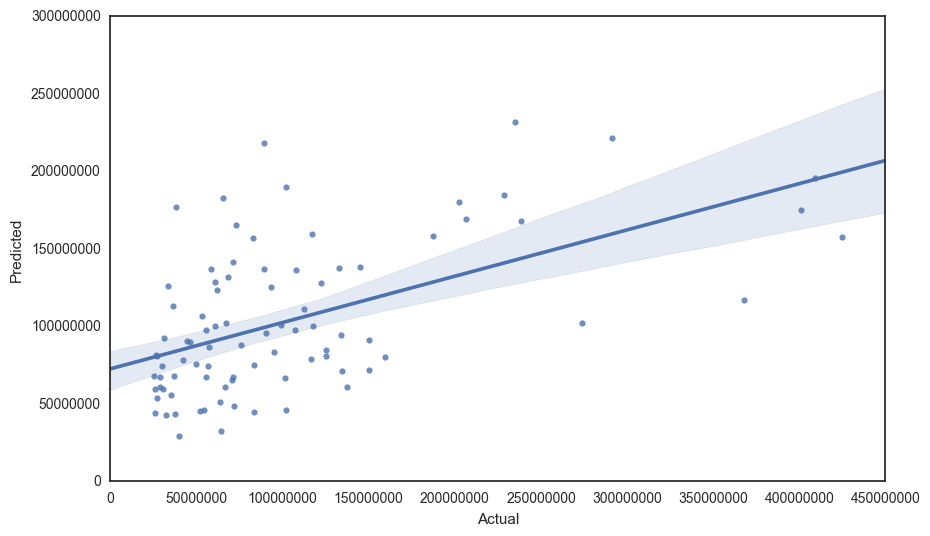

In [31]:
y_hat4 = model_4.predict(X4)
predict_plot(y4, y_hat4);

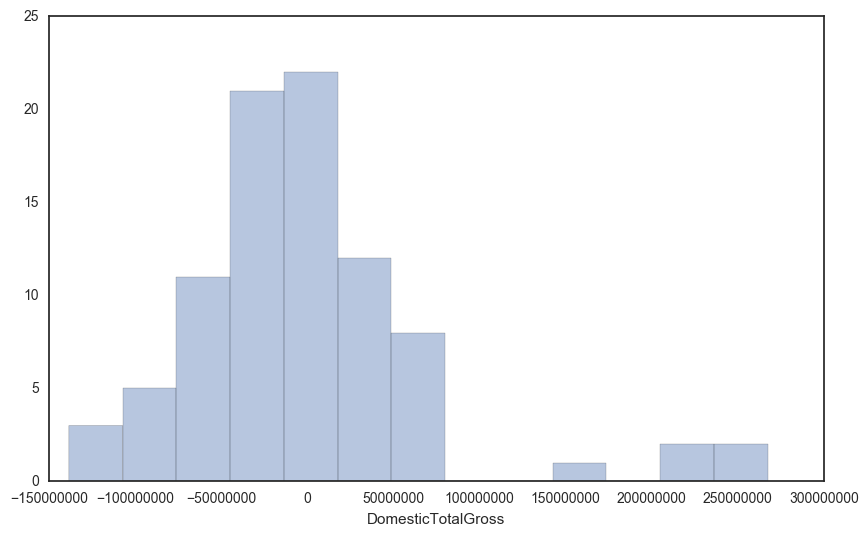

In [32]:
res_hist(y4, y_hat4);

### Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.33, random_state=16)

In [ ]:
model_5 = sm.OLS(y_train, X_train).fit()
model_5.summary()

In [ ]:
y_hat5 = model_5.predict(X_test)
predict_plot(y_test, y_hat5);

In [ ]:
res_hist(y_test, y_hat5);